# Introduction

The aim of this project is to analyze the client's behaviour towards credit card issuance and repayment on loans. The project uses data from the UCI Malchine Learning Repository [found here](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients). The ultimate goal is to develop a model that predicts which clients will default on their credit card payment and those who wouldn't.

The project is executed in the following outlines:

- Exploratory data analysis
- preprocessing
- Application of neural network algorithm
- Application of different classification algorithms for model generation
- Selection of best prediction model
- Training on entire dataset
- Final notes

The goal of this project is to create a reliable service for banks and other credit card issuance companies that will be able to detect clients who will default on the card repayments given some highlighted features of the client. This service will help these credit card issuance companies detect defaulters beforehand, thereby averting loss of credit, mitigate the cost of legal actions accrued as a result of default repayments, increase productivity of staff who will now spend less time verifying clients credibility, ensure smoother credit card issuance process for credible clients amongst others.

The features of the dataset are as follows:
```
ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

SEX: Gender (1=male, 2=female)

EDUCATION: (1 = graduate school; 2 = university; 3 = high school; 0, 4, 5, 6 = others).

MARRIAGE: Marital status (1=married, 2=single, 3=divorced, 0=others)

AGE: Age in years

PAY_0: Repayment status in September, 2005 (-2: No consumption; -1: Paid in full; 0: The use of revolving
credit, 1 = payment delay for one month; 2 = payment delay for two months; . . ., 8 = payment delay for eight months,
9 = payment delay for nine months and above.)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)
```

More explicitly, the non self-explanatory columns are illustrated as:  
* PAY_0 and PAY_2–PAY_6: These columns show the status of repayments made by each credit-card customer whose details are listed in the dataset. The six columns cover repayments made from April 2005 through September 2005, in reverse order. For example, PAY_0 indicates a customer's repayment status in September 2005 and PAY_6 indicates the customer's repayment status in April 2005.  
In each of the six PAY_X columns, the status code -2 = Balance paid in full and no transactions this period (we may refer to this credit card account as having been 'inactive' this period), -1 means that payment was made on time and the
code 1 means that payment was delayed by one month. 0 = Customer paid the minimum due amount, but not the entire balance. I.e., the customer paid enough for their account to remain in good standing, but did revolve a balance. The codes 2 through 8 represent delays in payment by two through eight months, respectively. And 9 means that payment was delayed by nine
or more months.  
PAY_0 should ideally be renamed to PAY_1. This will ensure that the PAY_X names conform to the naming convention used for the BILL_AMTX and PAY_AMTX columns. It will also preclude any questions about why PAY_0 is followed immediately by PAY_2.

* BILL_AMT1–BILL_AMT6: These columns list the amount billed to each customer from April 2005 through September 2005, in reverse order. The amounts are in New Taiwan (NT) dollars.


* PAY_AMT1–PAY_AMT6: These columns list, in reverse order, the amount that each customer paid back to the credit-card company from April 2005 through September 2005. Each of these amounts was paid to settle the preceding month's bill, either in full or partially. For example, each September 2005 amount was paid to settle the corresponding customer's August 2005 bill. The amounts are in NT dollars

### Exploratory Data Analysis (EDA)

For ease of analysis, the EDA will be performed using `Pandas-profiling` package.  
The `Pandas-Profiling` package generates profile reports (.html or other extensions) from a pandas DataFrame. As we know, the `pandas df.describe()` function is great but a little basic for serious exploratory data analysis. `pandas_profiling` extends the pandas DataFrame with `df.profile_report()` for quick data analysis.We get a great visual handy report to see the dossier about our data set. The link to the descriptives report can be found [here]()

In [1]:
!pip install ipython-autotime

%load_ext autotime

time: 3.18 ms (started: 2021-05-15 14:03:05 +00:00)


In [2]:
# connect colab notebook to drive
from google.colab import drive

# mount google drive
drive.mount('/content/gdrive')

# change directory to project's directory
%cd /content/gdrive/My Drive/predict_credit_card_default

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/predict_credit_card_default
time: 7.24 ms (started: 2021-05-15 14:03:05 +00:00)


In [3]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# load the dataset
data = pd.read_excel('data.xls', header = 1)

# check
data.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,0,0,47929,48905,49764,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


time: 2.51 s (started: 2021-05-15 14:03:07 +00:00)


In [4]:
# rename PAY_0 and default.payment.next.month columns
data.rename(columns={'PAY_0': 'PAY_1',
                     'default payment next month': 'default'},
            inplace = True)

# check
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


time: 36.5 ms (started: 2021-05-15 14:03:10 +00:00)


In [5]:
# Check for missing values in the dataset
data.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

time: 29 ms (started: 2021-05-15 14:03:12 +00:00)


From the above output we discover that there are no missing values in all columns of the dataset. Hence, we have an already cleaned dataset and we'll proceed to perform Exploratory data analysis

Below we installed the latest version of `pandas-profiling` using pip. This is because the default version installs comes with a deprecated package. 
After installation, we import the package

In [6]:
# get the dependent and independent variables
X = data.drop(['default', 'ID'], 1)
y = data['default']

time: 6.57 ms (started: 2021-05-15 14:03:14 +00:00)


In [12]:
# install latest version of pandas profiling
#!pip install pandas-profiling==3.0.0

     |████████████████████████████████| 256kB 9.2MB/s 
     |████████████████████████████████| 81kB 8.1MB/s 
     |████████████████████████████████| 645kB 20.1MB/s 
     |████████████████████████████████| 61kB 7.2MB/s 
     |████████████████████████████████| 112kB 46.7MB/s 
     |████████████████████████████████| 10.1MB 33.4MB/s 
     |████████████████████████████████| 3.1MB 38.2MB/s 
     |████████████████████████████████| 1.1MB 32.4MB/s 
     |████████████████████████████████| 296kB 43.1MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27085 sha256=f8f432d24b7e6d1c2b5a8f85ded7d2ddad074a78087e8d73042c36e094e07557
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107413 sha256=a87d2c3dd0b088e27889ac1b0a39117cf888e602b3cfa949dc276fe089cb24c2
  Stored in directory: /root/.cache/pip/wheels/c0/a3/b0/f27b1cfe32ea131a3715169132ff6d856

time: 14.7 s (started: 2021-05-15 14:01:56 +00:00)


In [7]:
import pandas_profiling 
#create a pandas profile report for the dataset
profile = pandas_profiling.ProfileReport(data, minimal=True)

#save the report in a html document
profile.to_file('credi_card_default_EDA.html')

Summarize dataset:   0%|          | 0/33 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

time: 15.9 s (started: 2021-05-15 14:03:23 +00:00)


From the profile report generated, the following observations were discovered:

- The average credit amount as calculated from the `LIMIT_BAL` column is `$167484.3227` and a standard deviation of `129747.6616`. This depicts that there is a very large variation in the amount of credit issued to clients which is evident also in the minimum credit of `1000` and maximum of `1000000`. The skewness of the `LIMIT_BAL` feature (`0.9928669605`), reveals that the variable is skewed to the right, with majority of the credit limit on cards less than `500000` dollars.

- Females represent 60.4% of sampled clients in the dataset
- Majority of sampled clients are university graduates. They represent about 46.8% of clients in the dataset, and are closely followed by clients in graduate school representing 35.3%.
-  Single clients represent 53.2% of total clients
- Majority of clients are less than 50 years, with the youngest client being just 21 years and the oldest being 79 years. The average age of clients is 35 years.
- Majority of the clients used revolving credit, as depicted by the profile report for the `PAY_1` column, where 49.1% of clients indicated a `0` value

# Preprocessing
Since the dataset has no missing values from our EDA, we'll move to preprocess the data, using appropriate techniques required for each feature.

The preprocessing steps we'll take includes:  
- Unlike what we saw in the Data Dictionary, the profile report shows that `EDUCATION` column has 7 distinct values. Since the values with explicit information are just `1=graduate school, 2=university, 3=high school, 4=others,` with the rest (0, 5, 6) representing unknown, we'll convert rows that hold these under representing values to `4` (others).
- splitting the entire dataset into training and test sets
- standardization

In [8]:
# bin some values in the education column
X[(X['EDUCATION'] == 0) | (X['EDUCATION'] == 5) | (X['EDUCATION'] == 6)] = 4

X['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

time: 14 ms (started: 2021-05-15 14:04:35 +00:00)


In [9]:
# import package for splitting data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=33)

# import standard scalar
from sklearn.preprocessing import StandardScaler

# instantiate the standard scalar
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

# check
X_train_ss

array([[-1.19482966,  0.67320416,  0.21251328, ..., -0.26855851,
        -0.28198535, -0.25332386],
       [-0.73314976, -1.14735997, -1.13124751, ..., -0.14411153,
        -0.31741068, -0.28694982],
       [-1.04093636, -1.14735997,  1.55627407, ..., -0.30100384,
        -0.31741068, -0.28694982],
       ...,
       [-0.42536315, -1.14735997, -1.13124751, ..., -0.18772759,
        -0.17101282, -0.17486329],
       [-0.3484165 ,  0.67320416,  1.55627407, ..., -0.25343409,
        -0.18288835, -0.26677424],
       [ 1.49830313,  0.67320416,  0.21251328, ...,  1.41552363,
        -0.1987895 , -0.16864249]])

time: 66.7 ms (started: 2021-05-15 14:04:53 +00:00)


The preprocesing steps is complete for the dataset. Next we'll move to modelling

# Modelling

The task at hand is a supervised learning task that requires the application of binary classification algorithms to correctly classify credit card users into defaulters and non-defaulters. There are numerous classification algorithms with implementations in scikit-learn. For the purpose of this project, 6 most popular clasification algorithms will be used for modelling. The accuracy metric will be used for evaluating the performance of each model. The algorithms include:

- Naive Bayes
- Logistic regression
- K-nearest neighbors
- (Kernel) SVM
- Decision tree
- Ensemble learning

Deep learning techniques will also be implemented to generate a neural deep network for classification using the `tensorflow.keras` library.

The accuracy metrics of the generated models will be compared and the model with the best performance will be used for training on the entire dataset.


# Applying Neural Networks 

In [ ]:
# import the keras module
import keras

# import the sequential model 
from keras.models import Sequential

# import dense layer that connects all nodes in the previous layer to nodes in current layer
from keras.layers import Dense

# import optimizers
from keras.optimizers import SGD, Adam


# import dropout
from keras.layers import Dropout

# as recommended in the original paper on Dropout, a constraint is imposed on the weights for each hidden layer,
# ensuring that the maximum norm of the weights does not exceed a value of 3.
# This is done by setting the kernel_constraint argument on the Dense class when constructing the layers.
from keras.constraints import maxnorm

# instantiate the model
model = Sequential()

# Add the input layer  which transforms each input to a 1-dimensional array 
model.add(keras.layers.Flatten(input_shape = (23, )))

# Add the first hidden layer with 4000 nodes, specify activation='relu'
model.add(Dense(4000, activation='relu', kernel_constraint=maxnorm(4)))

# Add the first dropout layer
model.add(Dropout(0.2))

# Add a second hidden Dense layer. This should have 2000 nodes and a 'relu' activation.
model.add(Dense(2000, activation='relu', kernel_constraint=maxnorm(4)))

# Add a second dropout layer
model.add(Dropout(0.2))

# Add a third hidden Dense layer. This should have 1000 nodes and a 'relu' activation.
model.add(Dense(1000, activation='relu', kernel_constraint=maxnorm(4)))

# Add the third dropout layer
model.add(Dropout(0.2))

# Finally, add an output layer, which is a Dense layer with 2 classes. Use sigmoid activation function for binary classification.
model.add(Dense(1, activation='sigmoid'))

# see the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 23)                0         
_________________________________________________________________
dense (Dense)                (None, 4000)              96000     
_________________________________________________________________
dropout (Dropout)            (None, 4000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2000)              8002000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 2000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              2001000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)              0

In [ ]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.00001, momentum=0.99), metrics=['accuracy'])

time: 19.8 ms (started: 2021-04-30 12:27:30 +00:00)


In [ ]:
# Defines model callbacks
model_path = './model_dir/model.h5'
my_callbacks = [keras.callbacks.ModelCheckpoint(model_path, save_best_only=True, monitor='loss'), 
                keras.callbacks.EarlyStopping(patience=3, monitor='loss')
                ]


time: 4.25 ms (started: 2021-04-30 12:27:30 +00:00)


In [ ]:
# fit the model on the train dataset
history = model.fit(X_train_ss, y_train, epochs=100, callbacks=[my_callbacks])

Epoch 1/100
844/844 [==============================] - 112s 131ms/step - loss: 0.6504 - accuracy: 0.6552
Epoch 2/100
844/844 [==============================] - 108s 128ms/step - loss: 0.5395 - accuracy: 0.7772
Epoch 3/100
844/844 [==============================] - 106s 125ms/step - loss: 0.5169 - accuracy: 0.7803
Epoch 4/100
844/844 [==============================] - 102s 120ms/step - loss: 0.5064 - accuracy: 0.7784
Epoch 5/100
844/844 [==============================] - 99s 117ms/step - loss: 0.5014 - accuracy: 0.7822
Epoch 6/100
844/844 [==============================] - 100s 119ms/step - loss: 0.4881 - accuracy: 0.7944
Epoch 7/100
844/844 [==============================] - 99s 117ms/step - loss: 0.4885 - accuracy: 0.7950
Epoch 8/100
844/844 [==============================] - 101s 120ms/step - loss: 0.4779 - accuracy: 0.8006
Epoch 9/100
844/844 [==============================] - 101s 119ms/step - loss: 0.4737 - accuracy: 0.8033
Epoch 10/100
844/844 [==============================] - 1

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


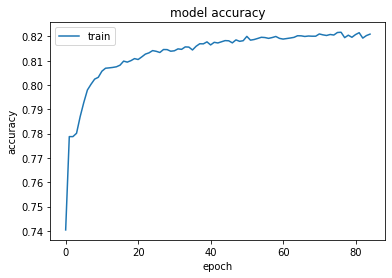

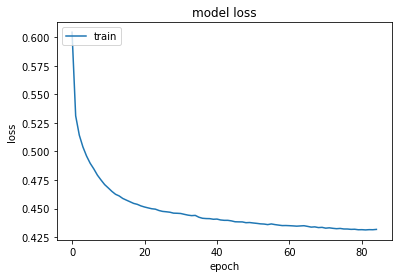

Accuracy score of Neural network using ANN is 0.8253333333333334
time: 2.35 s (started: 2021-04-30 15:48:01 +00:00)


In [ ]:
# make predictions on the test set
nn_pred = model.predict_classes(X_test_ss).ravel()

# summarize history for accuracy
print('\n')
plt.plot(history.history['accuracy']) # accuracy of train set
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
nn_acc = accuracy_score(y_test, nn_pred)
print(f'Accuracy score of Neural network using ANN is {nn_acc}')

### MultiNomial Naive Bayes

Since multinomial naive bayes does not work with negative values and some of the values in the array are negative, we'll use a different scalar for the data other than standard scalar

In [ ]:
# import minmaxscalar
from sklearn.preprocessing import MinMaxScaler

# import the naive bayes classifier
from sklearn.naive_bayes import MultinomialNB

# import gridsearch cv
from sklearn.model_selection import GridSearchCV

# instantiate minmax scalar
mms = MinMaxScaler()

X_train_mm = mms.fit_transform(X_train)
X_test_mm = mms.transform(X_test)

# instantiate the classifier with default parameters
mnb_model = MultinomialNB()

# define search space
space_mnb = dict()
space_mnb['alpha'] = [0.1, 0.01, 0.001, 0.0001, 0.00001, 1.0, 2.0]

# grid search the hyper parameter
mnb_search = GridSearchCV(estimator=mnb_model, param_grid=space_mnb, cv=10, n_jobs=-1)


# fit the mnb classifier on the train set
mnb_result = mnb_search.fit(X_train_mm, y_train)

# print the best score from the search
print(f'The best score from the search is {mnb_result.best_score_}', '\n')

# print the best parameter
print(f'The best parameter from the search is {mnb_result.best_params_}')

The best score from the search is 0.7787777777777778 

The best parameter from the search is {'alpha': 0.1}
time: 2.37 s (started: 2021-05-01 11:11:15 +00:00)


From the above score and parameter, we'll run the training on the data using the parameter observed from the search

In [ ]:
# instantiate the MNB with the resultant alpha parameter
mnb = MultinomialNB(alpha=0.1)

# fit the model on the train data
mnb.fit(X_train_mm, y_train)

# predict on the test set
mnb_pred = mnb.predict(X_test_mm)

print(f'using Multinomial Naive Bayes Classifier, The accuracy score is:, {accuracy_score(y_test, mnb_pred)}')
print(f'After 10 cross validations, the MNB Classifier had a score of:, {np.mean(cross_val_score(mnb, X_test_mm, y_test, cv=10))}')

using Multinomial Naive Bayes Classifier, The accuracy score is:, 0.779
After 10 cross validations, the MNB Classifier had a score of:, 0.7789999999999999
time: 59.9 ms (started: 2021-05-01 11:53:11 +00:00)


Out of 3,000 test samples, 78% was correctly classified using the MNB classifier.

# Logistic Regression

In [ ]:
# import logistic regression classifier
from sklearn.linear_model import LogisticRegression

# instantiate the LR classifier with default parameters
lr_model = LogisticRegression()

# define search space
space_lr = dict()
space_lr['solver'] = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
space_lr['penalty'] = ['l1', 'l2', 'elasticnet']
space_lr['C'] = [0.1, 0.5, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 1.0, 2.0, ]

# grid search the hyper parameter
lr_search = GridSearchCV(estimator=lr_model, param_grid=space_lr, cv=10, n_jobs=-1)

# fit the lr classifier on the train set
lr_result = lr_search.fit(X_train_ss, y_train)

# print the best score from the search
print(f'The best score from the search is {lr_result.best_score_}', '\n')

# print the best parameters from the search
print(f'The best parameter from the search is {lr_result.best_params_}')

The best score from the search is 0.8042592592592592 

The best parameter from the search is {'C': 0.5, 'penalty': 'l1', 'solver': 'liblinear'}
time: 3min 26s (started: 2021-05-01 11:47:21 +00:00)


In [ ]:
# instantiate the LR with the resultant hyperparameters
lr = LogisticRegression(C=0.5, penalty='l1', solver='liblinear')

# fit the model on the train data
lr.fit(X_train_ss, y_train)

# predict on the test set
lr_pred = lr.predict(X_test_ss)

print(f'using Logistics Regression Classifier, The accuracy score is:, {accuracy_score(y_test, lr_pred)}')
print(f'After 10 cross validations, the Logistics Regression Classifier had a score of:, {np.mean(cross_val_score(lr, X_test_ss, y_test, cv=10))}')

using Logistics Regression Classifier, The accuracy score is:, 0.8066666666666666
After 10 cross validations, the Logistics Regression Classifier had a score of:, 0.8003333333333333
time: 1.09 s (started: 2021-05-01 11:52:59 +00:00)


The accuracy increased by 0.002 after the hyper parameters were tuned and the Logistic Regression classifier performed better than the MNB Classifier

# K-Nearest Neighbors Classifier

In [ ]:
# Import the KNN classifier
from sklearn.neighbors import  KNeighborsClassifier

# instantiate the LR classifier with default parameters
knn_model = KNeighborsClassifier()

# define search space for hyperparameters
space_knn = dict()
space_knn['n_neighbors'] = [2, 3, 4, 5, 6, 7, 8, 9, 10]
space_knn['weights'] = ['uniform', 'distance']
space_knn['algorithm'] = ['auto', 'ball_tree', 'kd_tree', 'brute']
space_knn['leaf_size'] = [10, 20, 30, 40, 50]

# grid search the hyperparameters
knn_search = GridSearchCV(estimator=knn_model, param_grid=space_knn, cv=10, n_jobs=-1)

# fit the knn classifier on the train set
knn_result = knn_search.fit(X_train_ss, y_train)

# print the best score from the search
print(f'The best score from the search is {knn_result.best_score_}', '\n')

# print the best parameters from the search
print(f'The best parameter from the search is {knn_result.best_params_}')

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


The best score from the search is 0.8045555555555556 

The best parameter from the search is {'algorithm': 'auto', 'leaf_size': 50, 'n_neighbors': 10, 'weights': 'uniform'}
time: 2h 22min 55s (started: 2021-05-01 12:07:34 +00:00)


In [ ]:
# instantiate the KNN classifier with the resultant hyperparameters
knn = KNeighborsClassifier(algorithm='auto', leaf_size=50, n_neighbors=10, weights='uniform', n_jobs=-1)

# fit the model on the train data
knn.fit(X_train_ss, y_train)

# predict on the test set
knn_pred = knn.predict(X_test_ss)

print(f'using K Neighbors Classifier, The accuracy score is:, {accuracy_score(y_test, knn_pred)}')
print(f'After 10 cross validations, the K Neighbors Classifier had a score of:, {np.mean(cross_val_score(knn, X_test_ss, y_test, cv=10))}')

using K Neighbors Classifier, The accuracy score is:, 0.8163333333333334
After 10 cross validations, the K Neighbors Classifier had a score of:, 0.808
time: 4.56 s (started: 2021-05-01 14:36:41 +00:00)


From the above accuracy score, it is evident that KNN outperformed MNB and LR significantly, generating and accuracy score of 0.816 on the test set

# Support Vector Machine (SVM Classifier)

In [ ]:
# import the SVM classifier
from sklearn.svm import SVC

# instantiate the SVC classifier with the default hyperparameters
svc = SVC()

# fit the model on the train data
svc.fit(X_train_ss, y_train)

# predict on the test set
svc_pred = svc.predict(X_test_ss)

print(f'using Support Vector Classifier, The accuracy score is:, {accuracy_score(y_test, svc_pred)}')
print(f'After 10 cross validations, the Support Vector Classifier had a score of:, {np.mean(cross_val_score(svc, X_test_ss, y_test, cv=10))}')

using Support Vector Classifier, The accuracy score is:, 0.822
After 10 cross validations, the Support Vector Classifier had a score of:, 0.8193333333333334
time: 50.2 s (started: 2021-05-03 09:19:19 +00:00)


The accuracy score of the support vector Classifier outperformed all the other preceeding traditional ML models we have trained, but was outperformed by the ANN model with a fraction of 0.003

# Decision Trees
Use grid search to find the best parameters 

In [ ]:
# import decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# instantiate the DT classifier with default parameters
dtc_model = DecisionTreeClassifier()

# define search space for hyperparameters
space_dtc = dict()
space_dtc['criterion'] = ['gini', 'entropy']
space_dtc['splitter'] = ['best', 'random']
space_dtc['min_samples_split'] = [2, 4, 6, 8, 10]
space_dtc['max_features'] = ['auto', 'sqrt', 'log2']

# grid search the hyperparameters
dtc_search = GridSearchCV(estimator=dtc_model, param_grid=space_dtc, cv=10, n_jobs=-1)

# fit the DT classifier on the train set
dtc_result = dtc_search.fit(X_train_ss, y_train)

# print the best score from the search
print(f'The best score from the search is {dtc_result.best_score_}', '\n')

# print the best parameters from the search
print(f'The best parameter from the search is {dtc_result.best_params_}')

The best score from the search is 0.7732962962962964 

The best parameter from the search is {'criterion': 'gini', 'max_features': 'log2', 'min_samples_split': 10, 'splitter': 'random'}
time: 45.2 s (started: 2021-05-03 09:25:26 +00:00)


In [ ]:
# instantiate the DT classifier with the resultant hyperparameters
dtc = DecisionTreeClassifier(criterion='gini', max_features='log2', min_samples_split=10, splitter='random')

# fit the model on the train data
dtc.fit(X_train_ss, y_train)

# predict on the test set
dtc_pred = dtc.predict(X_test_ss)

print(f'using Decision Trees Classifier, The accuracy score is:, {accuracy_score(y_test, dtc_pred)}')
print(f'After 10 cross validations, the Decision Trees Classifier had a score of:, {np.mean(cross_val_score(dtc, X_test_ss, y_test, cv=10))}')

using Decision Trees Classifier, The accuracy score is:, 0.783
After 10 cross validations, the Decision Trees Classifier had a score of:, 0.7753333333333334
time: 78.6 ms (started: 2021-05-03 09:29:54 +00:00)


The accuracy score of the decision tree classifier performed worse than the all other preceeding models.

# Random Forest Classifier

In [ ]:
# import random forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the RF classifier with the default hyperparameters
rfc = RandomForestClassifier()

# fit the model on the train data
rfc.fit(X_train_ss, y_train)

# predict on the test set
rfc_pred = rfc.predict(X_test_ss)

print(f'using Random Forest Classifier, The accuracy score is:, {accuracy_score(y_test, rfc_pred)}')
print(f'After 10 cross validations, the Random Forest Classifier had a score of:, {np.mean(cross_val_score(rfc, X_test_ss, y_test, cv=10))}')

# define search space for hyperparameters
# space_rfc = dict()
# space_rfc['n_estimators'] = [100, 200, 500, 1000]
# space_rfc['min_samples_split'] = [2, 4, 6, 8, 10]
# space_rfc['max_features'] = ['auto', 'sqrt', 'log2']

using Random Forest Classifier, The accuracy score is:, 0.824
After 10 cross validations, the Random Forest Classifier had a score of:, 0.8186666666666668
time: 15.4 s (started: 2021-05-03 21:40:38 +00:00)


From all the implemented traditional Machine Learning models, Random Forest performed best in training the data and was only beaten by the neural network model with a minor fraction.

# Selection of best prediction model

From all the applied algorithms, the **Deep Neural network** performed best by yielding an **accuracy score** of approximately **0.825** on the test set of **3,000** samples. This accuracy score on the test data outperformed that of **SVC** which had **accuracy score** of **0.822**, **KNN’s 0.816, Logistics Regression’s 0.807, Multinomial Naive Bayes’ 0.779, Decision Trees 0.775** and **Random Forest’s 0.824**. Thus, the Neural network was selected for deployment.

# Training on entire dataset
The Entire data was trained using the ANN. This is to ensure that the model trains on enough data in order to improve its predictive efficiency on unseen data. The Accuracy score will be computed still on the entire data and compared to the predicted feature of the data to measure model performance.




In [10]:
# check the entire dataset
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


time: 49.1 ms (started: 2021-05-15 14:05:56 +00:00)


We'll preprocess the entire data using the following steps:

- Drop the `ID` column
- Isolate the `default` column which is the predicted feature
- Bin values in the `Education` Column
- Scale the features data using standard scaler

#### Drop the ID column

In [11]:
# check the shape of the data
data.shape

(30000, 25)

time: 6.48 ms (started: 2021-05-15 14:06:05 +00:00)


In [12]:
# Isolate the predicted feature
target = data['default']

# check
print(target.shape)

# drop ID and default columns
data.drop(['ID', 'default'], axis=1, inplace=True)

# check
data.head()

(30000,)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


time: 53.1 ms (started: 2021-05-15 14:06:06 +00:00)


In [13]:
# check the values of the education column
data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

time: 9.9 ms (started: 2021-05-15 14:06:10 +00:00)


In [14]:
# bin values of the education column
data[(data['EDUCATION'] == 0) | (data['EDUCATION'] == 5) | (data['EDUCATION'] == 6)] = 4

# check
data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

time: 18 ms (started: 2021-05-15 14:06:12 +00:00)


### Preprocess the entire data using standard scaler and save the scaler

In [15]:
# import the scaler
from sklearn.preprocessing import StandardScaler

# import joblib for saving and loading binary files
from  joblib import dump
from joblib import load

# instantiate the scaler
scaler = StandardScaler()

# scale the features data using standard scaler
scaler.fit(data)

# save the scaler
dump(scaler, 'scaled_data.joblib')

['scaled_data.joblib']

time: 39.4 ms (started: 2021-05-15 14:06:24 +00:00)


In [16]:
# check the scaler mean and standard deviations
print(scaler.mean_, '\n'); scaler.scale_

[ 1.65561502e+05  1.63100000e+00  1.84226667e+00  1.58076667e+00
  3.51064667e+01  3.09666667e-02 -8.39333333e-02 -1.15633333e-01
 -1.70066667e-01 -2.15200000e-01 -2.38500000e-01  5.03164653e+04
  4.83344410e+04  4.62154227e+04  4.25832832e+04  3.97323530e+04
  3.83719462e+04  5.58849837e+03  5.82144120e+03  5.13657327e+03
  4.76963970e+03  4.73512893e+03  5.11648983e+03] 



array([1.30360641e+05, 5.49398762e-01, 7.44482054e-01, 5.80755323e-01,
       9.75462958e+00, 1.19747278e+00, 1.27164796e+00, 1.27318325e+00,
       1.24945748e+00, 1.21784877e+00, 1.23359275e+00, 7.31004605e+04,
       7.06607261e+04, 6.88607994e+04, 6.39480431e+04, 6.04612734e+04,
       5.92820578e+04, 1.64941099e+04, 2.29447389e+04, 1.74765097e+04,
       1.56169251e+04, 1.51522715e+04, 1.75499039e+04])

time: 15.2 ms (started: 2021-05-15 14:06:26 +00:00)


In [17]:
# load the saved scaler
load_scaler = load('scaled_data.joblib')

# check
load_scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

time: 20.6 ms (started: 2021-05-15 14:06:30 +00:00)


In [18]:
# transform the entire data
scaled_data = load_scaler.transform(data)

# check
scaled_data

array([[-1.11660622,  0.6716433 ,  0.21186989, ..., -0.30541478,
        -0.31250291, -0.29153948],
       [-0.34950351,  0.6716433 ,  0.21186989, ..., -0.24138169,
        -0.31250291, -0.17757874],
       [-0.57963432,  0.6716433 ,  0.21186989, ..., -0.24138169,
        -0.2465062 , -0.00663763],
       ...,
       [-1.03989595, -1.14852825,  0.21186989, ..., -0.03647579,
        -0.1805095 , -0.11490033],
       [-0.65634459, -1.14852825,  1.55508562, ..., -0.18208704,
         3.1829466 , -0.18874689],
       [-0.8864754 , -1.14852825,  0.21186989, ..., -0.24138169,
        -0.2465062 , -0.23455911]])

time: 19.5 ms (started: 2021-05-15 14:06:32 +00:00)


In [ ]:
# import the keras module
import keras

# import the sequential model 
from keras.models import Sequential

# import dense layer that connects all nodes in the previous layer to nodes in current layer
from keras.layers import Dense

# import optimizers
from keras.optimizers import SGD, Adam


# import dropout
from keras.layers import Dropout

# as recommended in the original paper on Dropout, a constraint is imposed on the weights for each hidden layer,
# ensuring that the maximum norm of the weights does not exceed a value of 3.
# This is done by setting the kernel_constraint argument on the Dense class when constructing the layers.
from keras.constraints import maxnorm

# instantiate the model
nn_model = Sequential()

# Add the input layer  which transforms each input to a 1-dimensional array 
nn_model.add(keras.layers.Flatten(input_shape = (23, )))

# Add the first hidden layer with 4000 nodes, specify activation='relu'
nn_model.add(Dense(4000, activation='relu', kernel_constraint=maxnorm(4)))

# Add the first dropout layer
nn_model.add(Dropout(0.2))

# Add a second hidden Dense layer. This should have 2000 nodes and a 'relu' activation.
nn_model.add(Dense(2000, activation='relu', kernel_constraint=maxnorm(4)))

# Add a second dropout layer
nn_model.add(Dropout(0.2))

# Add a third hidden Dense layer. This should have 1000 nodes and a 'relu' activation.
nn_model.add(Dense(1000, activation='relu', kernel_constraint=maxnorm(4)))

# Add the third dropout layer
nn_model.add(Dropout(0.2))

# Finally, add an output layer, which is a Dense layer with 2 classes. Use sigmoid activation function for binary classification.
nn_model.add(Dense(1, activation='sigmoid'))

# see the summary of the model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 23)                0         
_________________________________________________________________
dense (Dense)                (None, 4000)              96000     
_________________________________________________________________
dropout (Dropout)            (None, 4000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2000)              8002000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 2000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              2001000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)              0

In [ ]:
# Compile model
nn_model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.00001, momentum=0.99), metrics=['accuracy'])

In [ ]:
# Defines model callbacks
nn_model_path = './model_dir/nn_model.h5'
nn_callbacks = [keras.callbacks.ModelCheckpoint(nn_model_path, save_best_only=True, monitor='loss'), 
                keras.callbacks.EarlyStopping(patience=3, monitor='loss')
                ]

In [ ]:
# fit the model on the entire dataset
nn_history = nn_model.fit(scaled_data, target, epochs=100, callbacks=[nn_callbacks])

Epoch 1/100
938/938 [==============================] - 114s 121ms/step - loss: 0.6409 - accuracy: 0.7020
Epoch 2/100
938/938 [==============================] - 111s 118ms/step - loss: 0.5365 - accuracy: 0.7757
Epoch 3/100
938/938 [==============================] - 111s 118ms/step - loss: 0.5195 - accuracy: 0.7742
Epoch 4/100
938/938 [==============================] - 112s 119ms/step - loss: 0.4986 - accuracy: 0.7805
Epoch 5/100
938/938 [==============================] - 112s 120ms/step - loss: 0.4920 - accuracy: 0.7887
Epoch 6/100
938/938 [==============================] - 112s 120ms/step - loss: 0.4846 - accuracy: 0.7954
Epoch 7/100
938/938 [==============================] - 113s 120ms/step - loss: 0.4822 - accuracy: 0.7999
Epoch 8/100
938/938 [==============================] - 111s 118ms/step - loss: 0.4712 - accuracy: 0.8063
Epoch 9/100
938/938 [==============================] - 110s 118ms/step - loss: 0.4711 - accuracy: 0.8043
Epoch 10/100
938/938 [==============================] -

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


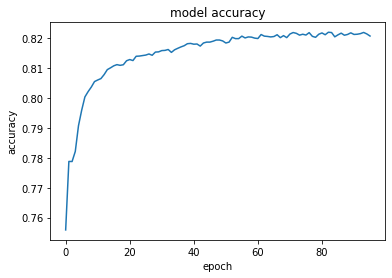

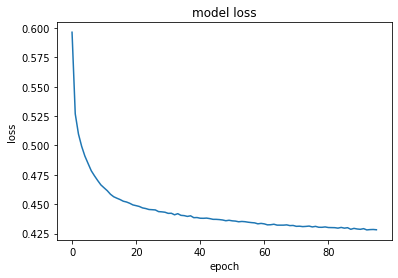

Accuracy score of using the neural network trained on the entire data, to predict the test data is 0.8263333333333334


In [ ]:
# make predictions on the entire daset
pred = nn_model.predict_classes(X_test_ss).ravel()

# summarize history for accuracy predictions on entire data
print('\n')
plt.plot(nn_history.history['accuracy']) # accuracy of entire data
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

# summarize history for losses on entire data
plt.plot(nn_history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()
acc = accuracy_score(y_test, pred)
print(f'Accuracy score of using the neural network trained on the entire data, to predict the test data is {acc}')

# Final notes

The above shows that there is an improvement in the accuracy score, when trained on more data.  
The **accuracy score** when the network was trained on the just the **training data** of **27,000** observations was **0.825**, while the accuracy score when training was done on the **entire data** of **30,000** observations improved to **0.826**

# Perform Scaling and Check the Class of a New Input

In [21]:
from keras.models import load_model

loaded_model = load_model('./model_dir/nn_model.h5')

# scale the input
Raw_Data =  np.array([50000, 1, 2, 1, 46, 3, 1, 1, 1, 1, 1, 47929, 48905, 49764, 36535, 32428, 15313, 0, 0, 0, 0, 0, 0]).reshape(1, -1)
scaled_input = load_scaler.transform(Raw_Data)

# check
scaled_input

array([[-0.8864754 , -1.14852825,  0.21186989, -1.00001953,  1.1167552 ,
         2.47941613,  0.85238476,  0.87625511,  0.93645977,  0.99782504,
         1.00397801, -0.03266006,  0.00807463,  0.05153262, -0.09458121,
        -0.12081044, -0.38897007, -0.33881782, -0.25371573, -0.29391299,
        -0.30541478, -0.31250291, -0.29153948]])

time: 311 ms (started: 2021-05-15 14:09:01 +00:00)


In [23]:
# get prediction result
result = loaded_model.predict(scaled_input)

print(result)
if result >= 0.3: # adjust the threshold due to class imbalance
            print('Defaulter')
else:
    print('Non Defaulter')

[[0.8196786]]
Defaulter
time: 106 ms (started: 2021-05-15 14:26:54 +00:00)
